In [13]:
import numpy as np
from random import random
from openpyxl import load_workbook, Workbook

In [52]:
wb = load_workbook(filename = 'win_probabilities.xlsx')
ws = wb['win_probabilities.csv']
wins = np.ndarray(shape=(16,16), dtype=float)
for i in range(16):
    for j in range(16):
        wins[i][j] = 0.0
i = 1
while i < len(ws['A']):
    if ws['A'][i].value[0] == 'W':
        home = int(ws['A'][i].value[4]) - 1
    else:
        home = int(ws['A'][i].value[4]) + 7
    if ws['B'][i].value[0] == 'W':
        away = int(ws['B'][i].value[4]) - 1
    else:
        away = int(ws['B'][i].value[4]) + 7
    wins[home][away] = ws['C'][i].value
    wins[away][home] = 1-ws['D'][i].value
    i += 1

/usr/local/lib/python3.5/dist-packages/openpyxl/reader/worksheet.py:310: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [53]:
wb = load_workbook(filename = 'Business-Track-Application-Datasets.xlsx')
ws = wb['Hypothetical Playoff Gate Data']
rev = np.ndarray(shape=(16,4), dtype=float)
for i in range(3, 19):
    for j in range(2, 6):
        if i >= 11:
            k = i - 8
        else:
            k = i + 8
        rev[k-3][j-2] = ws[i][j].value

In [54]:
def htclear(ht):
    
    ht = None
    from random import random
    ht = dict()
    for i in range(4):
        ht[i] = dict()
        for j in range(16):
            ht[i][j] = 0
    return ht
ht = htclear(ht)

In [55]:
def t2wins(ph, pa):
    pa = 1 - pa
    w4 = ph**2 * pa**2
    w5 = (2*ph*(1-ph)*pa**2+2*ph**2*pa*(1-pa))*ph
    w6 = (3*ph*(1-ph)**2*pa**2+ph**3*(1-pa)**2+3*2*ph**2*(1-ph)*pa*(1-pa))*pa
    w7 = ((1-ph)**3*pa**3
          + ph**3*(1-pa)**3
          + 9*ph**2*(1-ph)*pa*(1-pa)**2
          + 9*ph*(1-ph)**2*pa**2*(1-pa)) * ph
    ph, pa = 1-ph, 1-pa
    w4 += ph**2 * pa**2
    w5 += (2*ph*(1-ph)*pa**2+2*ph**2*pa*(1-pa))*ph
    w6 += (3*ph*(1-ph)**2*pa**2+ph**3*(1-pa)**2+3*2*ph**2*(1-ph)*pa*(1-pa))*pa
    w7 += ((1-ph)**3*pa**3
          + ph**3*(1-pa)**3
          + 9*ph**2*(1-ph)*pa*(1-pa)**2
          + 9*ph*(1-ph)**2*pa**2*(1-pa)) * ph    
    
    return [w4, w5, w6, w7]
#t2wins(wins[0][10], wins[10][0])

In [56]:
def macths(tt1,tt2):
    if (tt2 < tt1 and tt1 < 8) or (tt2 + 8 < tt1):
        t1, t2 = tt2, tt1
    else:
        t1, t2 = tt1, tt2
        
    t1wins, t2wins = 0, 0
    t1h, t2h = 0, 0
    i = 0
    while t1wins<4 and t2wins<4:
        if i==0 or i==1 or i==4 or i==6:
            p = wins[t1][t2]
            flag = True
        else:
            p = 1 - wins[t2][t1]
            flag = False
        if random() < p:
            t1wins += 1
            if flag:
                t1h += 1
            else:
                t2h += 1
        else:
            t2wins += 1
            if flag:
                t1h += 1
            else:
                t2h += 1
        i += 1
    if t1wins == 4:
        winner = t1
    else:
        winner = t2
    j = 0
    while j < 3 and ht[j][t1] != 0:
        j += 1
    ht[j][t1] = t1h
    ht[j][t2] = t2h
    #print(winner, t1wins, t2wins, t1h, t2h, t1, ht[t1], t2, ht[t2], wins[t1][t2], wins[t2][t1])     
    #print('winner', winner, t1wins, t2wins)
    #print('t1h, t2h', t1h, t2h, t1, ht[t1], t2, ht[t2])
    return winner
    #return winner, t1wins, t2wins, t1h, t2h, wins[t1][t2], wins[t2][t1]

def season():
    tlist = list(range(16))
    round_one_win_list = []
    for i in range(4):
        round_one_win_list.append(macths(tlist[i],tlist[7-i]))
    for i in range(4):
        round_one_win_list.append(macths(tlist[8+i],tlist[15-i]))
    round_two_win_list = []
    for i in range(2):
        round_two_win_list.append(macths(round_one_win_list[i],round_one_win_list[3-i]))
    for i in range(2):
        round_two_win_list.append(macths(round_one_win_list[4+i],round_one_win_list[7-i]))
    round_three_win_list = []
    round_three_win_list.append(macths(round_two_win_list[0],round_two_win_list[1]))
    round_three_win_list.append(macths(round_two_win_list[2],round_two_win_list[3]))        
    round_four_win_list = macths(round_three_win_list[0],round_three_win_list[1])
    return round_one_win_list, round_two_win_list, round_three_win_list, round_four_win_list

def revenue(t):
    total = 0
    for i in range(4):
        total += rev[t][i] * ht[i][t]
    return total


In [57]:
#check macths()
'''
k =0
n =1000000
for i in range(n):
    if macths(0,1)[0]==0:
        k += 1
print(k/n)
'''

'\nk =0\nn =1000000\nfor i in range(n):\n    if macths(0,1)[0]==0:\n        k += 1\nprint(k/n)\n'

In [58]:
import numpy as np
import matplotlib.pyplot as plt

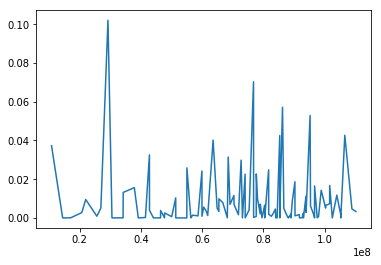

In [112]:
n = 100000
dis = []
for i in range(n):
    season()
    dis.append(revenue(0))
    ht = htclear(ht)
dis.sort()
htdis = dict()
for ele in dis:
    if ele not in htdis:
        htdis[ele] = 1
    else:
        htdis[ele] += 1
x = []
y = []
n = len(dis)
for ele in htdis:
    x.append(ele)
    y.append(htdis[ele]/n)
yy = [i for _,i in sorted(zip(y,x))]
x.sort()
plt.plot(x, y)
plt.show()